# The Boston Housing Assess Dataset Analysis Project

In [ ]:
# Part II: Using Feature Selection Techniques to prepare data for model training
# In this Notebook, we use multiple feature selection method to reduce the total number of features in the dataset

In [12]:
import os
from time import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from pandas import read_csv

In [2]:
myDataPath = 'M:\\Work\\Study\\WPI-DS\\CurrentCourse-DS504\\DataSets\\SelectedDataSet\\'
subFolder = 'BigDataset_Preprocess/'
fileName = 'BH_BigDataset_2020Full.csv'
outputFame = 'BH_BigDataset_2020Reduced.csv'
fileBigData = myDataPath + subFolder + fileName
fileBigDataReduced = myDataPath + subFolder + outputFame
print('Input data file:\n', fileBigData)
print('Output data file:\n', fileBigDataReduced)

Input data file:
 M:\Work\Study\WPI-DS\CurrentCourse-DS504\DataSets\SelectedDataSet\BigDataset_Preprocess/BH_BigDataset_2020Full.csv
Output data file:
 M:\Work\Study\WPI-DS\CurrentCourse-DS504\DataSets\SelectedDataSet\BigDataset_Preprocess/BH_BigDataset_2020Reduced.csv


In [3]:
# Let's load the dataset from processed folder
data = read_csv(fileBigData)
# Dimension of the dataset
print(np.shape(data))

(161296, 197)


In [4]:
# Review the header of the data
df = data
display(HTML(df.head().to_html()))
# data.head() doesn't show some columns in the middle

,AV_TOTAL,YR_BUILT,YR_REMOD,LIVING_AREA,NUM_FLOORS,R_BDRMS,R_FULL_BTH,R_HALF_BTH,R_FPLACE,U_BASE_FLOOR,U_NUM_PARK,U_BDRMS,U_FULL_BTH,U_HALF_BTH,U_FPLACE,LU_A,LU_AH,LU_C,LU_CC,LU_CD,LU_CL,LU_CP,LU_E,LU_EA,LU_I,LU_R1,LU_R2,LU_R3,LU_R4,LU_RC,LU_RL,OWN_OCC_N,OWN_OCC_Y,R_BLDG_STYL_104 - TWO-FAM DWELLI,R_BLDG_STYL_105 - THREE-FAM DWEL,R_BLDG_STYL_99 - Vacant,R_BLDG_STYL_BL - Bi-Level,R_BLDG_STYL_BW - Bungalow,R_BLDG_STYL_CL - Colonial,R_BLDG_STYL_CN - Contemporary,R_BLDG_STYL_CP - Cape,R_BLDG_STYL_CV - Conventional,R_BLDG_STYL_DK - Decker,R_BLDG_STYL_DX - Duplex,R_BLDG_STYL_OT - Other,R_BLDG_STYL_RE - Row End,R_BLDG_STYL_RM - Row Middle,R_BLDG_STYL_RN - Ranch,R_BLDG_STYL_RR - Raised Ranch,R_BLDG_STYL_SD - Semi-Det,R_BLDG_STYL_SL - Split Level,R_BLDG_STYL_TD - Tudor,R_BLDG_STYL_TF - Two Fam Stack,R_BLDG_STYL_TL - Tri-Level,R_BLDG_STYL_VT - Victorian,R_ROOF_TYP_F - Flat,R_ROOF_TYP_G - Gable,R_ROOF_TYP_H - Hip,R_ROOF_TYP_L - Gambrel,R_ROOF_TYP_M - Mansard,R_ROOF_TYP_O - Other,R_ROOF_TYP_S - Shed,R_EXT_FIN_10 - Alum/Vinyl,R_EXT_FIN_A - Asbestos,R_EXT_FIN_B - Brick/Stone,R_EXT_FIN_C - Cement Board,R_EXT_FIN_F - Frame/Clapbrd,R_EXT_FIN_G - Glass,R_EXT_FIN_K - Concrete,R_EXT_FIN_M - Vinyl,R_EXT_FIN_O - Other,R_EXT_FIN_P - Asphalt,R_EXT_FIN_S - Stucco,R_EXT_FIN_U - Alum Siding,R_EXT_FIN_V - Brck/Stn Venr,R_EXT_FIN_W - Wood Shake,R_BTH_STYLE_L - Luxury,R_BTH_STYLE_M - Modern,R_BTH_STYLE_N - No Remodeling,R_BTH_STYLE_S - Semi-Modern,R_BTH_STYLE2_L - Luxury,R_BTH_STYLE2_M - Modern,R_BTH_STYLE2_N - No Remodeling,R_BTH_STYLE2_S - Semi-Modern,R_BTH_STYLE3_L - Luxury,R_BTH_STYLE3_M - Modern,R_BTH_STYLE3_N - No Remodeling,R_BTH_STYLE3_S - Semi-Modern,R_KITCH_0F - 0 Full Eat In K,R_KITCH_1F - 1 Full Eat In K,R_KITCH_2F - 2 Full Eat In K,R_KITCH_3F - 3 Full Eat In K,R_KITCH_4F - 4 Full Eat In K,R_KITCH_F - Full Eat In,R_KITCH_N - None,R_KITCH_O - One Person,R_KITCH_STYLE_L - Luxury,R_KITCH_STYLE_M - Modern,R_KITCH_STYLE_N - No Remodeling,R_KITCH_STYLE_S - Semi-Modern,R_KITCH_STYLE2_L - Luxury,R_KITCH_STYLE2_M - Modern,R_KITCH_STYLE2_N - No Remodeling,R_KITCH_STYLE2_S - Semi-Modern,R_KITCH_STYLE3_L - Luxury,R_KITCH_STYLE3_M - Modern,R_KITCH_STYLE3_N - No Remodeling,R_KITCH_STYLE3_S - Semi-Modern,R_HEAT_TYP_E - Electric,R_HEAT_TYP_F - Forced Hot Air,R_HEAT_TYP_N - None,R_HEAT_TYP_O - Other,R_HEAT_TYP_P - Heat Pump,R_HEAT_TYP_S - Space Heat,R_HEAT_TYP_W - Ht Water/Steam,R_AC_C - Central AC,R_AC_D - Ductless AC,R_AC_N - None,R_AC_Y - Yes,R_EXT_CND_A - Average,R_EXT_CND_E - Excellent,R_EXT_CND_F - Fair,R_EXT_CND_G - Good,R_EXT_CND_P - Poor,R_OVRALL_CND_A - Average,R_OVRALL_CND_E - Excellent,R_OVRALL_CND_F - Fair,R_OVRALL_CND_G - Good,R_OVRALL_CND_P - Poor,R_INT_CND_A - Average,R_INT_CND_E - Excellent,R_INT_CND_F - Fair,R_INT_CND_G - Good,R_INT_CND_P - Poor,R_INT_FIN_E - Elaborate,R_INT_FIN_N - Normal,R_INT_FIN_S - Substandard,R_VIEW_A - Average,R_VIEW_E - Excellent,R_VIEW_F - Fair,R_VIEW_G - Good,R_VIEW_P - Poor,U_CORNER_N - No,U_CORNER_Y - Yes,U_ORIENT_A - Rear Above,U_ORIENT_B - Rear Below,U_ORIENT_C - Courtyard,U_ORIENT_E - End,U_ORIENT_F - Front/Street,U_ORIENT_M - Middle,U_ORIENT_T - Through,U_BTH_STYLE_L - Luxury,U_BTH_STYLE_M - Modern,U_BTH_STYLE_N - No Remodeling,U_BTH_STYLE_S - Semi-Modern,U_BTH_STYLE2_L - Luxury,U_BTH_STYLE2_M - Modern,U_BTH_STYLE2_N - No Remodeling,U_BTH_STYLE2_S - Semi-Modern,U_BTH_STYLE3_L - Luxury,U_BTH_STYLE3_M - Modern,U_BTH_STYLE3_N - No Remodeling,U_BTH_STYLE3_S - Semi-Modern,U_KITCH_TYPE_1F - 1 Full Eat In K,U_KITCH_TYPE_F - Full Eat In,U_KITCH_TYPE_N - None,U_KITCH_TYPE_O - One Person,U_KITCH_TYPE_P - Pullman,U_KITCH_STYLE_L - Luxury,U_KITCH_STYLE_M - Modern,U_KITCH_STYLE_N - No Remodeling,U_KITCH_STYLE_S - Semi-Modern,U_HEAT_TYP_E - Electric,U_HEAT_TYP_F - Forced Hot Air,U_HEAT_TYP_N - None,U_HEAT_TYP_O - Other,U_HEAT_TYP_P - Heat Pump,U_HEAT_TYP_S - Space Heat,U_HEAT_TYP_W - Ht Water/Steam,U_AC_C - Central AC,U_AC_D - Ductless AC,U_AC_N - None,U_INT_FIN_E - Elaborate,U_INT_FIN_G - Good,U_INT_FIN_N - Normal,U_INT_FIN_

# Feature Selection

Here we are going to focus on some methods that evaluates the importance of features
Then try to reduce them if possible to see if the models are improved after the changes

General feature selection methods

1. Check the coeffiencts from different linear modes
2. SKLearn function: Feature_selection.SelectKBest
3. SHAP values
4. Recursive feature elimination (RFE)
        

In [5]:
# Training Data uses all available data
x = data.loc[:,data.columns != 'AV_TOTAL']
y = data['AV_TOTAL']

In [6]:
# Split data for model training
from sklearn.model_selection import train_test_split
fSplit = 0.001 #0.3
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=fSplit, random_state=6)

# Prepared for training model using split
# Because we are only focusing on the feature selection here, we use all dataset as training data
X_train = x
y_train = y

In [7]:
print('Original data: ', data.shape)
print('Training data X: ', X_train.shape)
print('Training data y: ', y_train.shape)

Original data:  (161296, 197)
Training data X:  (161296, 196)
Training data y:  (161296,)


## Method 1: Linear Regression Results - Correlation
Below we used three linear models and plot their largest absolute coefficient values

In [8]:
%matplotlib inline
import matplotlib
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import utils
from sklearn import metrics
from sklearn import preprocessing

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 

In [9]:
ImptNameDict = {}

In [13]:
print("Training Linear Model 3-1...")
algoName = 'LinearRegression'
print("Training %s..." % algoName)
ticS = time()
selector = SelectFromModel(estimator = LinearRegression()).fit(X_train, y_train)
ticE = time()
print("{} Model fit done in {:.4f}s".format(algoName, ticE - ticS))

coefs = selector.estimator_.coef_
coefs31 = coefs #Keep a copy

Training Linear Model 3-1...
Training LinearRegression...
LinearRegression Model fit done in 2.6310s


Text(0.5,1,'Coefficients in the LinearRegression Model')

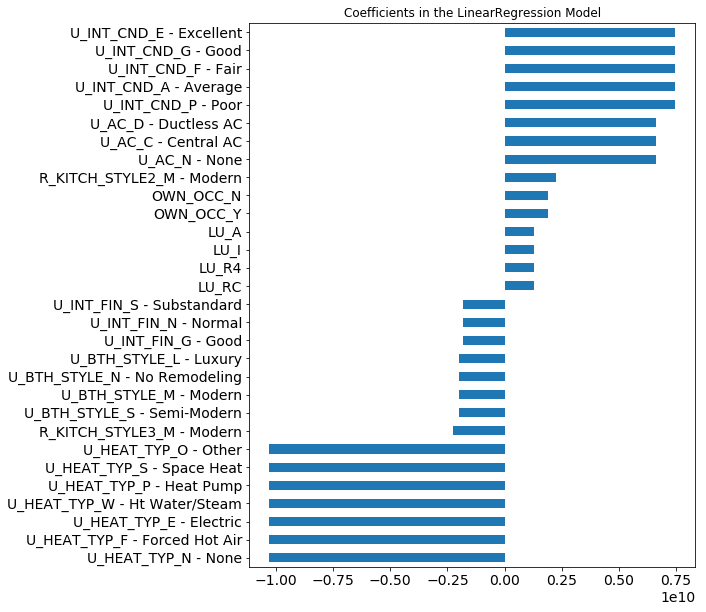

In [14]:
coefs = pd.Series(coefs, index = X_train.columns)

important_coefs = pd.concat([coefs.sort_values().head(15),
                     coefs.sort_values().tail(15)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)

important_coefs.plot(kind = "barh")
plt.title("Coefficients in the {0} Model".format(algoName))

In [15]:
ImptNameDict.update(important_coefs.to_dict())
print('Entries number in dictionary: ', len(ImptNameDict))
print(ImptNameDict)

Entries number in dictionary:  30
{'U_HEAT_TYP_N - None': -10293471651.422964, 'U_HEAT_TYP_F - Forced Hot Air': -10293471651.321215, 'U_HEAT_TYP_E - Electric': -10293471651.269972, 'U_HEAT_TYP_W - Ht Water/Steam': -10293471651.265234, 'U_HEAT_TYP_P - Heat Pump': -10293471651.196846, 'U_HEAT_TYP_S - Space Heat': -10293471651.193989, 'U_HEAT_TYP_O - Other': -10293471651.077188, 'R_KITCH_STYLE3_M - Modern': -2256305378.4236445, 'U_BTH_STYLE_S - Semi-Modern': -1981120331.15783, 'U_BTH_STYLE_M - Modern': -1981120331.152795, 'U_BTH_STYLE_N - No Remodeling': -1981120331.1331642, 'U_BTH_STYLE_L - Luxury': -1981120330.996434, 'U_INT_FIN_G - Good': -1823803400.00447, 'U_INT_FIN_N - Normal': -1823803399.5887158, 'U_INT_FIN_S - Substandard': -1823803399.5116043, 'LU_RC': 1286106121.0524335, 'LU_R4': 1286106121.0694978, 'LU_I': 1286106121.0741143, 'LU_A': 1286106121.2568533, 'OWN_OCC_Y': 1915264000.8545108, 'OWN_OCC_N': 1915264000.8661792, 'R_KITCH_STYLE2_M - Modern': 2256305378.392321, 'U_AC_N - N

In [16]:
print("Training Linear Model 3-2...")
algoName = 'Lasso'
print("Training %s..." % algoName)
ticS = time()
selector = SelectFromModel(estimator = Lasso(max_iter=10)).fit(X_train, y_train)
ticE = time()
print("{} Model fit done {:.4f}s".format(algoName, ticE - ticS))

coefs = selector.estimator_.coef_
coefs32 = coefs #Keep a copy

Training Linear Model 3-2...
Training Lasso...
Lasso Model fit done 0.7829s


Text(0.5,1,'Coefficients in the Lasso Model')

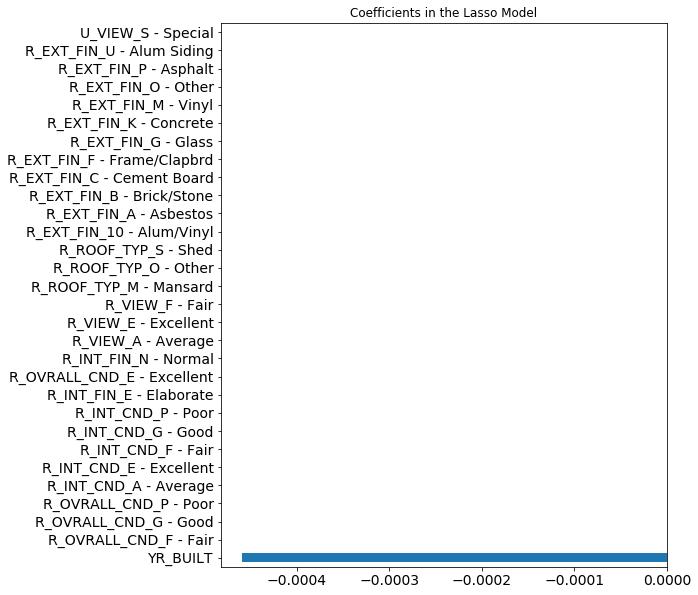

In [17]:
coefs = pd.Series(coefs, index = X_train.columns)

important_coefs = pd.concat([coefs.sort_values().head(15),
                     coefs.sort_values().tail(15)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)

important_coefs.plot(kind = "barh")
plt.title("Coefficients in the {0} Model".format(algoName))

In [18]:
ImptNameDict.update(important_coefs.to_dict())
print('Entries number in dictionary: ', len(ImptNameDict))
print(ImptNameDict)

Entries number in dictionary:  60
{'U_HEAT_TYP_N - None': -10293471651.422964, 'U_HEAT_TYP_F - Forced Hot Air': -10293471651.321215, 'U_HEAT_TYP_E - Electric': -10293471651.269972, 'U_HEAT_TYP_W - Ht Water/Steam': -10293471651.265234, 'U_HEAT_TYP_P - Heat Pump': -10293471651.196846, 'U_HEAT_TYP_S - Space Heat': -10293471651.193989, 'U_HEAT_TYP_O - Other': -10293471651.077188, 'R_KITCH_STYLE3_M - Modern': -2256305378.4236445, 'U_BTH_STYLE_S - Semi-Modern': -1981120331.15783, 'U_BTH_STYLE_M - Modern': -1981120331.152795, 'U_BTH_STYLE_N - No Remodeling': -1981120331.1331642, 'U_BTH_STYLE_L - Luxury': -1981120330.996434, 'U_INT_FIN_G - Good': -1823803400.00447, 'U_INT_FIN_N - Normal': -1823803399.5887158, 'U_INT_FIN_S - Substandard': -1823803399.5116043, 'LU_RC': 1286106121.0524335, 'LU_R4': 1286106121.0694978, 'LU_I': 1286106121.0741143, 'LU_A': 1286106121.2568533, 'OWN_OCC_Y': 1915264000.8545108, 'OWN_OCC_N': 1915264000.8661792, 'R_KITCH_STYLE2_M - Modern': 2256305378.392321, 'U_AC_N - N

In [19]:
print("Training Linear Model 3-3...")
algoName = 'Ridge'
print("Training %s..." % algoName)
ticS = time()
selector = SelectFromModel(estimator = Ridge()).fit(X_train, y_train)
ticE = time()
print("{} Model fit done in {:.4f}s".format(algoName, ticE - ticS))

coefs = selector.estimator_.coef_
coefs33 = coefs #Keep a copy

Training Linear Model 3-3...
Training Ridge...
Ridge Model fit done in 0.7191s


Text(0.5,1,'Coefficients in the Ridge Model')

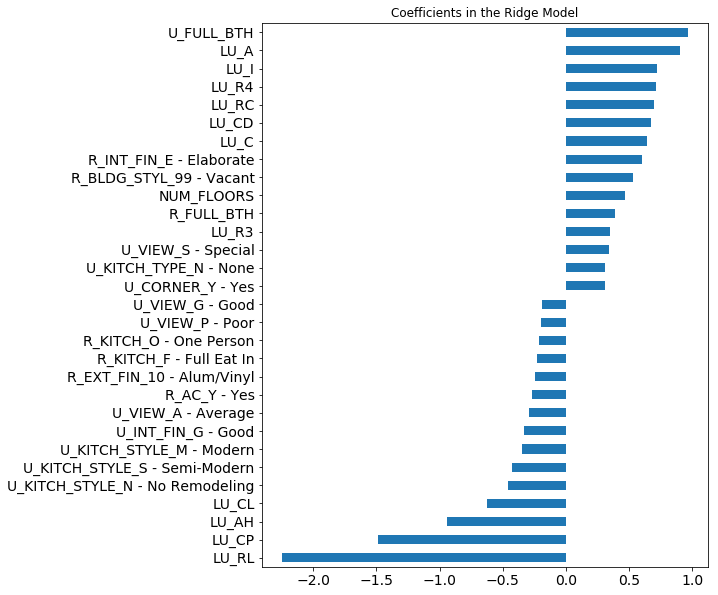

In [20]:
coefs = pd.Series(coefs, index = X_train.columns)

important_coefs = pd.concat([coefs.sort_values().head(15),
                     coefs.sort_values().tail(15)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)

important_coefs.plot(kind = "barh")
plt.title("Coefficients in the {0} Model".format(algoName))

In [21]:
ImptNameDict.update(important_coefs.to_dict())
print('Entries number in dictionary: ', len(ImptNameDict))
print(ImptNameDict)

Entries number in dictionary:  82
{'U_HEAT_TYP_N - None': -10293471651.422964, 'U_HEAT_TYP_F - Forced Hot Air': -10293471651.321215, 'U_HEAT_TYP_E - Electric': -10293471651.269972, 'U_HEAT_TYP_W - Ht Water/Steam': -10293471651.265234, 'U_HEAT_TYP_P - Heat Pump': -10293471651.196846, 'U_HEAT_TYP_S - Space Heat': -10293471651.193989, 'U_HEAT_TYP_O - Other': -10293471651.077188, 'R_KITCH_STYLE3_M - Modern': -2256305378.4236445, 'U_BTH_STYLE_S - Semi-Modern': -1981120331.15783, 'U_BTH_STYLE_M - Modern': -1981120331.152795, 'U_BTH_STYLE_N - No Remodeling': -1981120331.1331642, 'U_BTH_STYLE_L - Luxury': -1981120330.996434, 'U_INT_FIN_G - Good': -0.3332959921834588, 'U_INT_FIN_N - Normal': -1823803399.5887158, 'U_INT_FIN_S - Substandard': -1823803399.5116043, 'LU_RC': 0.6971884478933003, 'LU_R4': 0.7141712892435536, 'LU_I': 0.7178709968202771, 'LU_A': 0.90149896455759, 'OWN_OCC_Y': 1915264000.8545108, 'OWN_OCC_N': 1915264000.8661792, 'R_KITCH_STYLE2_M - Modern': 2256305378.392321, 'U_AC_N - N

## Method 2: Feature_selection.SelectKBest

In this feature selection method, we do not need to train any model, since only statistical calculations are carried out on the data.
The score functions used is:
f_regression: used for regression tasks, uses the F value
mutual_info_regression is available but not working yet!

In [22]:
#  SelectKBest works with univariate statistical tests, 
#  that calculate how the features relate with the target
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression      

feature_cols = X_train.columns

nTopSel = 40

#Not working!
#selector = SelectKBest(score_func = mutual_info_regression, k=nTopSel)    
selector = SelectKBest(score_func = f_regression, k=nTopSel)    
X_new = selector.fit_transform(X_train[feature_cols], y_train)
selected_features = pd.DataFrame(selector.inverse_transform(X_new),
                                 index = X_train.index,
                                 columns=feature_cols)

selected_columns = selected_features.columns[selected_features.var() != 0]  
print("selected_columns: ", selected_columns, "\n")


scores = pd.Series(selector.scores_)

sorted_scores = sorted(scores)[::-1][0:nTopSel]

print("sorted_scores: ", sorted_scores, "\n")


selected_columns:  Index(['LIVING_AREA', 'NUM_FLOORS', 'R_FULL_BTH', 'U_FULL_BTH', 'U_HALF_BTH',
       'U_FPLACE', 'LU_A', 'LU_CL', 'LU_CP', 'LU_R3', 'LU_RL', 'OWN_OCC_N',
       'OWN_OCC_Y', 'R_ROOF_TYP_F - Flat', 'R_EXT_FIN_B - Brick/Stone',
       'R_BTH_STYLE_M - Modern', 'R_BTH_STYLE2_M - Modern',
       'R_BTH_STYLE3_M - Modern', 'R_KITCH_3F - 3 Full Eat In K',
       'R_KITCH_STYLE_M - Modern', 'R_HEAT_TYP_W - Ht Water/Steam',
       'R_AC_C - Central AC', 'R_AC_N - None', 'R_EXT_CND_G - Good',
       'R_OVRALL_CND_G - Good', 'R_INT_CND_G - Good', 'R_INT_FIN_N - Normal',
       'R_VIEW_A - Average', 'U_BTH_STYLE_L - Luxury',
       'U_BTH_STYLE_M - Modern', 'U_BTH_STYLE2_L - Luxury',
       'U_BTH_STYLE2_M - Modern', 'U_BTH_STYLE3_L - Luxury',
       'U_BTH_STYLE3_M - Modern', 'U_KITCH_STYLE_L - Luxury',
       'U_HEAT_TYP_F - Forced Hot Air', 'U_AC_C - Central AC',
       'U_INT_FIN_E - Elaborate', 'U_INT_CND_E - Excellent',
       'U_VIEW_E - Excellent'],
      dtype='object'

In [23]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=18) 

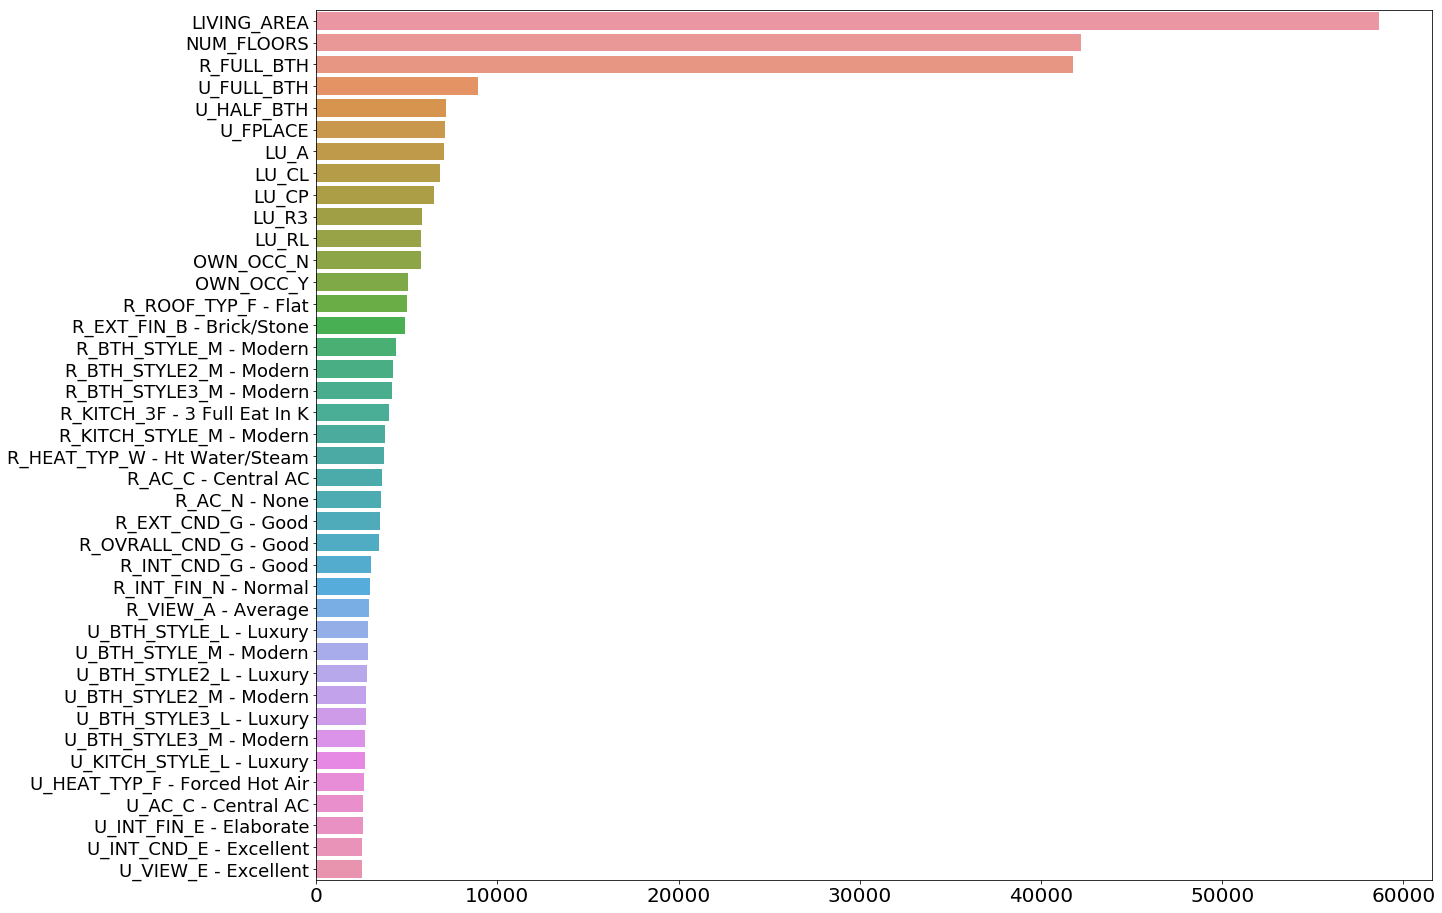

In [24]:
plt.figure(figsize=(20, 16))
sns.barplot(sorted_scores, selected_columns, orient = "h")

## Method 3: Shap values

SHAP values measure the impact of having a certain value for a feature in comparison to the prediction we would get if that feature took some baseline value.

In [38]:
import shap # package used to calculate Shap values
from lightgbm import LGBMRegressor

#  Time estimate for LGBMRegressor
print("This cell takes about 90 seconds to run. \n")

#  fit model
algoName = 'LGBMRegressor'
print("Training %s..." % algoName)
ticS = time()
my_model = LGBMRegressor(verbose=0, n_estimators=100, force_row_wise=True).fit(X_train, y_train) 

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# Calculate Shap values
shap_values = explainer.shap_values(X_train)
ticE = time()
print("{} Run shap explainer done in {:.4f}s".format(algoName, ticE - ticS))

shap.initjs()

display(shap.force_plot(explainer.expected_value, shap_values[0, :], X_train.iloc[0,:]))


This cell takes about 2 minutes to run. 

Training LGBMRegressor...
LGBMRegressor Run shap explainer done in 89.7263s


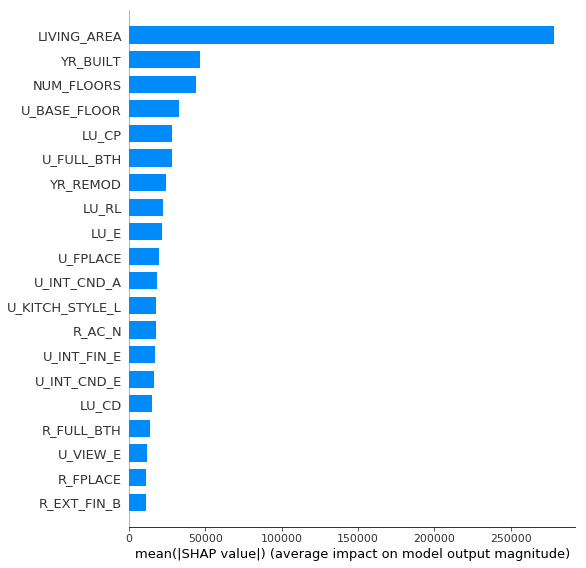

None

In [39]:
display(shap.summary_plot(shap_values, X_train, plot_type="bar"))

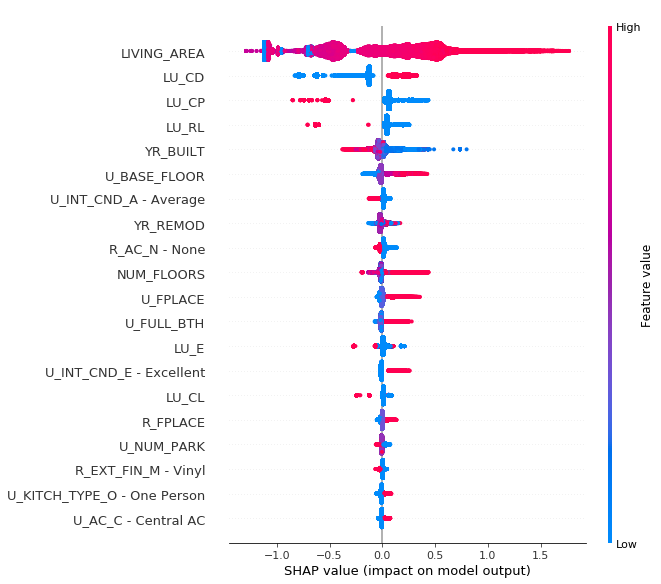

None

In [18]:
display(shap.summary_plot(shap_values, X_train))

## Method 4: Recursive feature elimination (RFE)

Recursive feature elimination works by analyzing the weights of a certain model.

In [26]:
from sklearn.feature_selection import RFE
from lightgbm import LGBMRegressor

#  Time estimate for LGBMRegressor
print("This cell takes about 360 seconds to run. \n")

#  fit model
algoName = 'LGBMRegressor'
print("Training %s..." % algoName)
ticS = time()
#my_model = RandomForestRegressor(n_estimators = 10, random_state=1)
my_model = LGBMRegressor(verbose=0, n_estimators=100, force_row_wise=True)
print("Conducting recursive feature elimination (RFE)...")
rfe = RFE(my_model, n_features_to_select=1)

print("fitting...")
rfe.fit(X_train, y_train)

ticE = time()
print("{} fitting for RFE in {:.4f}s".format(algoName, ticE - ticS))

This cell takes about 90 seconds to run. 

Training LGBMRegressor...
Conducting recursive feature elimination (RFE)...
fitting...
LGBMRegressor fitting for RFE in 359.4391s


In [27]:
# Print out all features in order of RFE's ranking
from operator import itemgetter

nTopN = 50
topColList = []
features = X_train.columns
# you have to pass the list 'features' with all the features which you trained the model with
iCnt = 0
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):   
    print(x, y)     # this line will print the rank x and the name of the feature y
    if iCnt < nTopN:
        topColList.append(y)
    iCnt += 1
    

1 YR_BUILT
2 LIVING_AREA
3 U_BASE_FLOOR
4 YR_REMOD
5 NUM_FLOORS
6 U_BDRMS
7 R_FULL_BTH
8 U_FPLACE
9 R_FPLACE
10 LU_C
11 R_BDRMS
12 U_NUM_PARK
13 U_KITCH_STYLE_M - Modern
14 LU_A
15 U_INT_CND_A - Average
16 LU_RC
17 LU_E
18 U_FULL_BTH
19 U_HALF_BTH
20 LU_CD
21 R_EXT_FIN_B - Brick/Stone
22 LU_CP
23 LU_RL
24 U_ORIENT_T - Through
25 R_INT_CND_G - Good
26 LU_EA
27 U_VIEW_A - Average
28 R_HALF_BTH
29 LU_CL
30 U_KITCH_STYLE_L - Luxury
31 U_AC_N - None
32 OWN_OCC_N
33 U_HEAT_TYP_F - Forced Hot Air
34 R_AC_N - None
35 LU_R1
36 R_BLDG_STYL_RM - Row Middle
37 R_OVRALL_CND_A - Average
38 U_VIEW_E - Excellent
39 U_INT_FIN_E - Elaborate
40 LU_I
41 R_BLDG_STYL_SD - Semi-Det
42 R_OVRALL_CND_F - Fair
43 R_EXT_FIN_W - Wood Shake
44 R_BLDG_STYL_RE - Row End
45 R_EXT_FIN_F - Frame/Clapbrd
46 LU_R4
47 U_KITCH_TYPE_O - One Person
48 U_AC_C - Central AC
49 U_INT_CND_E - Excellent
50 U_ORIENT_C - Courtyard
51 R_VIEW_E - Excellent
52 R_OVRALL_CND_P - Poor
53 R_INT_CND_E - Excellent
54 R_VIEW_G - Good
55 U_HEAT

In [28]:
print(len(topColList))
print(topColList)

50
['YR_BUILT', 'LIVING_AREA', 'U_BASE_FLOOR', 'YR_REMOD', 'NUM_FLOORS', 'U_BDRMS', 'R_FULL_BTH', 'U_FPLACE', 'R_FPLACE', 'LU_C', 'R_BDRMS', 'U_NUM_PARK', 'U_KITCH_STYLE_M - Modern', 'LU_A', 'U_INT_CND_A - Average', 'LU_RC', 'LU_E', 'U_FULL_BTH', 'U_HALF_BTH', 'LU_CD', 'R_EXT_FIN_B - Brick/Stone', 'LU_CP', 'LU_RL', 'U_ORIENT_T - Through', 'R_INT_CND_G - Good', 'LU_EA', 'U_VIEW_A - Average', 'R_HALF_BTH', 'LU_CL', 'U_KITCH_STYLE_L - Luxury', 'U_AC_N - None', 'OWN_OCC_N', 'U_HEAT_TYP_F - Forced Hot Air', 'R_AC_N - None', 'LU_R1', 'R_BLDG_STYL_RM - Row Middle', 'R_OVRALL_CND_A - Average', 'U_VIEW_E - Excellent', 'U_INT_FIN_E - Elaborate', 'LU_I', 'R_BLDG_STYL_SD - Semi-Det', 'R_OVRALL_CND_F - Fair', 'R_EXT_FIN_W - Wood Shake', 'R_BLDG_STYL_RE - Row End', 'R_EXT_FIN_F - Frame/Clapbrd', 'LU_R4', 'U_KITCH_TYPE_O - One Person', 'U_AC_C - Central AC', 'U_INT_CND_E - Excellent', 'U_ORIENT_C - Courtyard']


In [29]:
# Top 50 features selected by REF
print(len(topColList))
print(topColList)

50
['YR_BUILT', 'LIVING_AREA', 'U_BASE_FLOOR', 'YR_REMOD', 'NUM_FLOORS', 'U_BDRMS', 'R_FULL_BTH', 'U_FPLACE', 'R_FPLACE', 'LU_C', 'R_BDRMS', 'U_NUM_PARK', 'U_KITCH_STYLE_M - Modern', 'LU_A', 'U_INT_CND_A - Average', 'LU_RC', 'LU_E', 'U_FULL_BTH', 'U_HALF_BTH', 'LU_CD', 'R_EXT_FIN_B - Brick/Stone', 'LU_CP', 'LU_RL', 'U_ORIENT_T - Through', 'R_INT_CND_G - Good', 'LU_EA', 'U_VIEW_A - Average', 'R_HALF_BTH', 'LU_CL', 'U_KITCH_STYLE_L - Luxury', 'U_AC_N - None', 'OWN_OCC_N', 'U_HEAT_TYP_F - Forced Hot Air', 'R_AC_N - None', 'LU_R1', 'R_BLDG_STYL_RM - Row Middle', 'R_OVRALL_CND_A - Average', 'U_VIEW_E - Excellent', 'U_INT_FIN_E - Elaborate', 'LU_I', 'R_BLDG_STYL_SD - Semi-Det', 'R_OVRALL_CND_F - Fair', 'R_EXT_FIN_W - Wood Shake', 'R_BLDG_STYL_RE - Row End', 'R_EXT_FIN_F - Frame/Clapbrd', 'LU_R4', 'U_KITCH_TYPE_O - One Person', 'U_AC_C - Central AC', 'U_INT_CND_E - Excellent', 'U_ORIENT_C - Courtyard']


In [31]:
# Merge names from different results
newList = selected_columns.tolist()
print(len(newList))
print(newList)
newList.extend(x for x in ImptNameDict.keys() if x not in newList)
print(len(newList))
newList.extend(x for x in topColList if x not in newList)
print(len(newList))
print(newList)
# Note: the SHAP results are not calculated here but manually compared

40
['LIVING_AREA', 'NUM_FLOORS', 'R_FULL_BTH', 'U_FULL_BTH', 'U_HALF_BTH', 'U_FPLACE', 'LU_A', 'LU_CL', 'LU_CP', 'LU_R3', 'LU_RL', 'OWN_OCC_N', 'OWN_OCC_Y', 'R_ROOF_TYP_F - Flat', 'R_EXT_FIN_B - Brick/Stone', 'R_BTH_STYLE_M - Modern', 'R_BTH_STYLE2_M - Modern', 'R_BTH_STYLE3_M - Modern', 'R_KITCH_3F - 3 Full Eat In K', 'R_KITCH_STYLE_M - Modern', 'R_HEAT_TYP_W - Ht Water/Steam', 'R_AC_C - Central AC', 'R_AC_N - None', 'R_EXT_CND_G - Good', 'R_OVRALL_CND_G - Good', 'R_INT_CND_G - Good', 'R_INT_FIN_N - Normal', 'R_VIEW_A - Average', 'U_BTH_STYLE_L - Luxury', 'U_BTH_STYLE_M - Modern', 'U_BTH_STYLE2_L - Luxury', 'U_BTH_STYLE2_M - Modern', 'U_BTH_STYLE3_L - Luxury', 'U_BTH_STYLE3_M - Modern', 'U_KITCH_STYLE_L - Luxury', 'U_HEAT_TYP_F - Forced Hot Air', 'U_AC_C - Central AC', 'U_INT_FIN_E - Elaborate', 'U_INT_CND_E - Excellent', 'U_VIEW_E - Excellent']
102
120
['LIVING_AREA', 'NUM_FLOORS', 'R_FULL_BTH', 'U_FULL_BTH', 'U_HALF_BTH', 'U_FPLACE', 'LU_A', 'LU_CL', 'LU_CP', 'LU_R3', 'LU_RL', 'OWN_

In [32]:
# Selected features and output the dataframe
newList.insert(0, 'AV_TOTAL')
reduced_data = data[newList]
print(reduced_data.shape)

(161296, 121)


In [33]:
# We save processed file to a different name for later use
reduced_data.to_csv(fileBigDataReduced, index=False)
print('File saved to:', fileBigDataReduced)

File saved to: M:\Work\Study\WPI-DS\CurrentCourse-DS504\DataSets\SelectedDataSet\BigDataset_Preprocess/BH_BigDataset_2020Reduced.csv
